<a href="https://colab.research.google.com/github/patbolan/MPHY8147_S25/blob/main/Recon_2DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

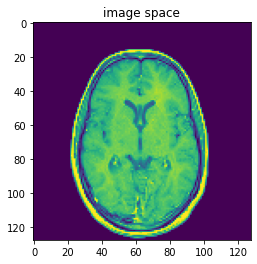

In [ ]:
# MODIFIED

# Load the MRI data from a URL
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
file_url = 'https://github.com/patbolan/MPHY5178_F22/blob/main/Math_Review/mri.npy?raw=true'

response = requests.get(file_url)
response.raise_for_status()
D = np.load(io.BytesIO(response.content))

# Pick a single slice to work with
img = D[:,:,0,12].astype(np.float32)
plt.imshow(img)
plt.title('image space')
plt.show()

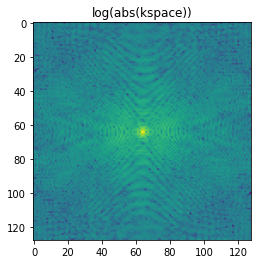

In [ ]:
# Learned on examples from Saad Jbabdi, https://users.fmrib.ox.ac.uk/~saad/
# Note the shifting. The convention of np.fft is [0, 2pi], so the zero frequencies
# are at the edges. In MRI we want the zero frequencies in the middle,
# [-pi/2,pi/2], so we have to shift to that convention
# Read this like shift(fft(undoshift(ksp)))

ksp = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(img)))
plt.imshow(np.log(np.abs(ksp)))
plt.title('log(abs(kspace))')
plt.show()



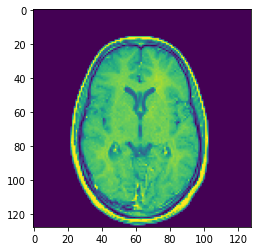

In [ ]:
# Go backwards!
# Note: ifftshift is exactly equal to fftshift if the matrix sizes are even
img2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(ksp)))
plt.imshow(np.abs(img2))
plt.show()